# CNN1D and CNN2D
conv1D와 conv2D를 사용해 CNN 모델을 생성합니다.
특히, [비트코인 상관분석](../data/correlation_btc.ipynb)을 통해 얻은 결론 활용

## 1. Input Data

In [10]:
import numpy as np
import pandas as pd

BTC_origin = pd.read_csv('../data/2012to2023BTC-USD_investing.csv') # 2012-04-08 to 2023-05-08

In [11]:
BTC_origin # [Date, Price] 사용

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 08, 2023","27,928.9","28,424.8","28,627.8","27,669.7",63.04K,-1.74%
1,"May 07, 2023","28,424.8","28,857.1","29,122.0","28,419.6",36.50K,-1.50%
2,"May 06, 2023","28,857.1","29,512.8","29,816.4","28,414.9",58.94K,-2.22%
3,"May 05, 2023","29,513.2","28,842.2","29,653.9","28,825.3",74.52K,2.33%
4,"May 04, 2023","28,842.1","29,023.6","29,352.7","28,687.4",53.80K,-0.63%
...,...,...,...,...,...,...,...
4043,"Apr 12, 2012",4.9,4.9,4.9,4.8,46.37K,0.00%
4044,"Apr 11, 2012",4.9,4.8,5.0,4.8,67.04K,1.86%
4045,"Apr 10, 2012",4.8,4.9,4.9,4.8,53.10K,0.00%
4046,"Apr 09, 2012",4.9,4.8,4.9,4.7,39.24K,1.67%


In [12]:
GLD_origin = pd.read_csv('../data/Gold_2018_2023.csv') # 1994-12-06 to 2021-12-06
GLD_origin # [Date, Close] 사용

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/29/2023,1966.1,1966.1,1966.1,1966.1,1966.1,21.0
1,3/28/2023,1972.4,1972.4,1972.4,1972.4,1972.4,21.0
2,3/27/2023,1957.2,1957.2,1952.4,1952.4,1952.4,877.0
3,3/24/2023,1991.7,1995.4,1982.1,1982.1,1982.1,19.0
4,3/23/2023,1990.5,1994.6,1990.5,1993.8,1993.8,33.0
...,...,...,...,...,...,...,...
1227,4/6/2018,1326.5,1333.0,1319.0,1331.9,1331.9,348.0
1228,4/5/2018,1333.5,1333.7,1322.6,1324.3,1324.3,258.0
1229,4/4/2018,1331.8,1347.3,1331.6,1335.8,1335.8,718.0
1230,4/3/2018,1340.4,1341.5,1328.5,1332.8,1332.8,702.0


In [13]:
btc = BTC_origin[['Date', 'Price']]
gld = GLD_origin[['Date', 'Close']]

In [14]:
btc['Price'] = btc['Price'].str.replace(',','').astype(float)
btc['Date'] = pd.to_datetime(btc['Date'], format="%b %d, %Y")

C:\Users\SW\AppData\Local\Temp\ipykernel_2208\1138983312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Price'] = btc['Price'].str.replace(',','').astype(float)
C:\Users\SW\AppData\Local\Temp\ipykernel_2208\1138983312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['Date'] = pd.to_datetime(btc['Date'], format="%b %d, %Y")


In [15]:
gld['Close'] = gld['Close'].astype(float)
gld['Date'] = pd.to_datetime(gld['Date'], format="%m/%d/%Y")

C:\Users\SW\AppData\Local\Temp\ipykernel_2208\2898800825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['Close'] = gld['Close'].astype(float)
C:\Users\SW\AppData\Local\Temp\ipykernel_2208\2898800825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['Date'] = pd.to_datetime(gld['Date'], format="%m/%d/%Y")


In [16]:
btc.set_index('Date', inplace=True) # 인덱스 변경
btc.rename(columns={'Price': 'BTC'}, inplace=True) # 열 이름 변경
print(btc)

                BTC
Date               
2023-05-08  27928.9
2023-05-07  28424.8
2023-05-06  28857.1
2023-05-05  29513.2
2023-05-04  28842.1
...             ...
2012-04-12      4.9
2012-04-11      4.9
2012-04-10      4.8
2012-04-09      4.9
2012-04-08      4.8

[4048 rows x 1 columns]


C:\Users\SW\AppData\Local\Temp\ipykernel_2208\4142647595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc.rename(columns={'Price': 'BTC'}, inplace=True) # 열 이름 변경


In [17]:
gld.set_index('Date', inplace=True) # 인덱스 변경
gld.rename(columns={'Price': 'Gold'}, inplace=True) # 열 이름 변경
print(gld)

             Close
Date              
2023-03-29  1966.1
2023-03-28  1972.4
2023-03-27  1952.4
2023-03-24  1982.1
2023-03-23  1993.8
...            ...
2018-04-06  1331.9
2018-04-05  1324.3
2018-04-04  1335.8
2018-04-03  1332.8
2018-04-02  1342.1

[1232 rows x 1 columns]


C:\Users\SW\AppData\Local\Temp\ipykernel_2208\727571049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld.rename(columns={'Price': 'Gold'}, inplace=True) # 열 이름 변경


In [18]:
goldBtc = btc.merge(gld, how='inner',right_index = True, left_index=True)
#Drop NA since we have nan values for weekends. S&P500 only trades business days
goldBtc.dropna(inplace=True)
print(goldBtc)

                BTC   Close
Date                       
2023-03-29  28350.4  1966.1
2023-03-28  27262.2  1972.4
2023-03-27  27129.8  1952.4
2023-03-24  27462.2  1982.1
2023-03-23  28310.7  1993.8
...             ...     ...
2018-04-06   6624.3  1331.9
2018-04-05   6782.0  1324.3
2018-04-04   6808.9  1335.8
2018-04-03   7424.2  1332.8
2018-04-02   7068.4  1342.1

[1232 rows x 2 columns]


ConversionError: Failed to convert value(s) to axis units: '2018-04-03'

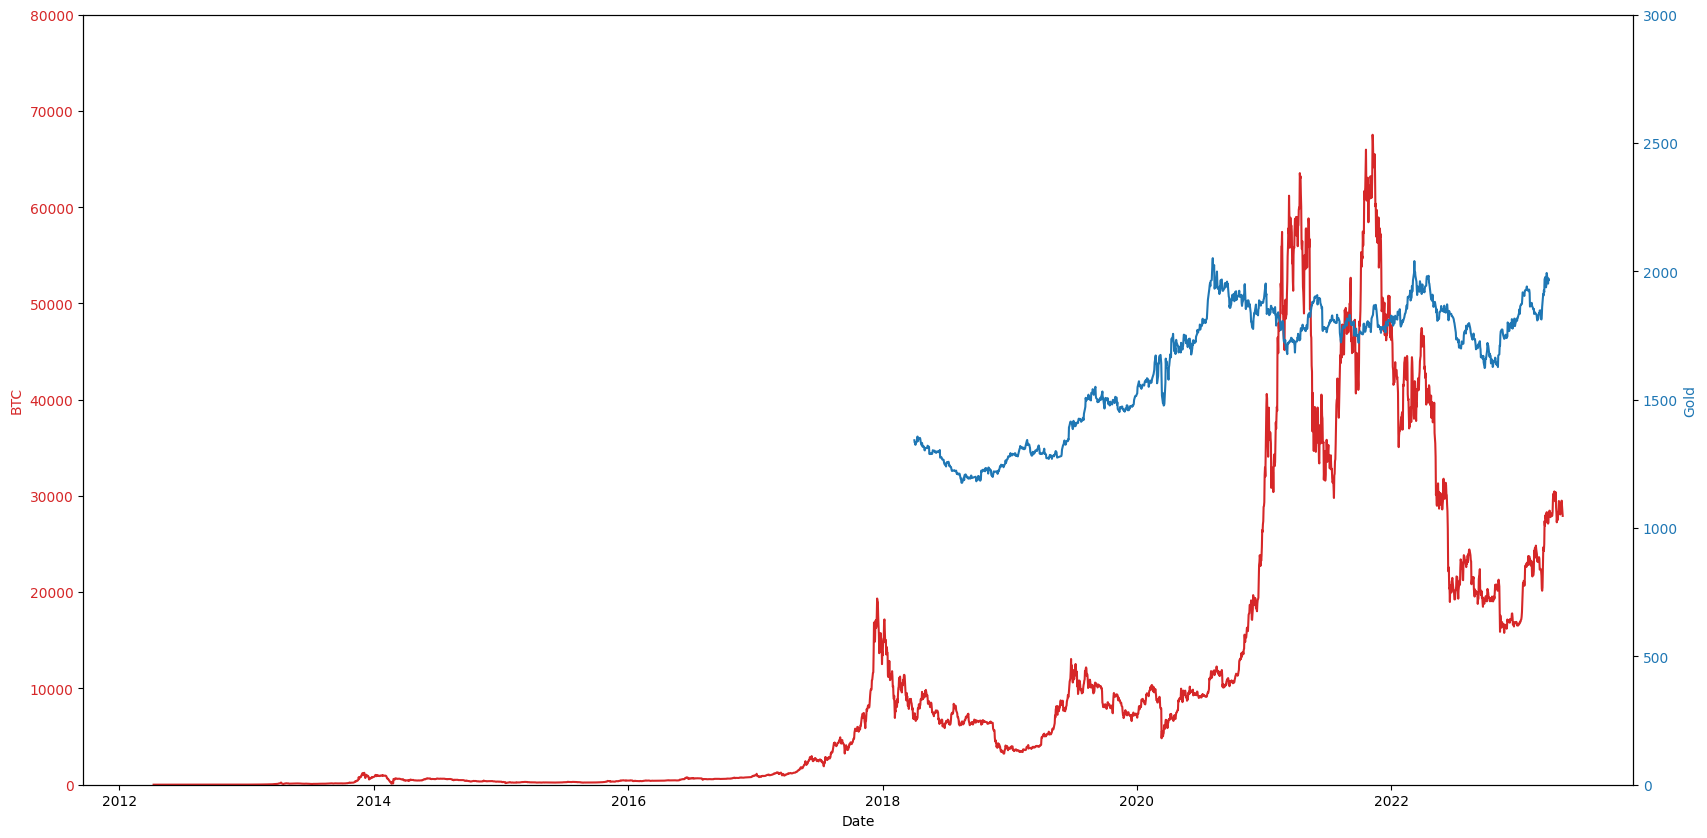

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 10))

# 첫 번째 y 축 (왼쪽)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC', color=color)
ax1.plot(btc.index, btc['BTC'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 80000])

# 두 번째 y 축 (오른쪽)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Gold', color=color)
ax2.plot(gld.index, gld['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 3000])

plt.xlim(['2018-04-03', '2023-03-29'])
plt.show()